In [2]:
# Import all of the python packages used in this workflow.
import scipy
import numpy as np
from collections import OrderedDict
import os, sys
from pylab import *
import pandas as pd
import numpy as np
import osr
import xarray as xr
import geopandas as gpd
from datetime import datetime
from datetime import timedelta  
import json
import matplotlib.pyplot as plt

#from sklearn.covariance import EmpiricalCovariance, MinCovDet

In [3]:
gdf = gpd.read_file('../CSO_SNOTEL_sites.geojson')
df = pd.read_csv('../CSO_SNOTEL_data_SWEDmeters.csv') 
gdf.head()

,code,longitude,latitude,name,elevation_m,easting,northing,geometry
0,314_WY_SNTL,-110.445442,43.940189,Base Camp,2151.887939453125,544505.845453,4.865379e+06,POINT (-110.44544 43.94019)
1,347_MT_SNTL,-111.128029,44.508320,Black Bear,2490.216064453125,489823.440274,4.928341e+06,POINT (-111.12803 44.50832)
2,350_WY_SNTL,-109.793327,44.376671,Blackwater,2980.944091796875,596129.923439,4.914418e+06,POINT (-109.79333 44.37667)
3,353_WY_SNTL,-110.609734,42.964001,Blind Bull Sum,2636.52001953125,531828.554679,4.756891e+06,POINT (-110.60973 42.96400)
4,379_WY_SNTL,-109.670212,43.697330,Burroughs Creek,2667,607155.527746,4.839116e+06,POINT (-109.67021 43.69733)


In [6]:
# calibration_2020-05-24_full_set.nc the MAE metric is actually r**2
data = xr.open_dataset('calibration_2020-06-08_full_set.nc')
data

<xarray.Dataset>
Dimensions:          (calibration_run: 10752, metric: 5, station: 30)
Coordinates:
  * calibration_run  (calibration_run) int64 0 1 2 3 ... 10748 10749 10750 10751
  * metric           (metric) object 'MAE' 'MBE' 'RMSE' 'NSE' 'KGE'
  * station          (station) object '314_WY_SNTL' ... '868_WY_SNTL'
Data variables:
    cal_metrics      (calibration_run, metric, station) float64 ...
Attributes:
    description:             SnowModel line calibration performance metrics
    calibration_parameters:  ro_snowmax,cf_precip_scalar,ro_adjust
    model_parameter:         SWE [m]

In [7]:
calibration = pd.read_csv('cal_params_2020-06-08_full_set.csv')
calibration.head()

,lat_solar_flag,lapse_rate,prec_lapse_rate,ro_snowmax,cf_precip_scalar,ro_adjust,gap_frac
0,0,"4.4,5.9,7.1,7.8,8.1,8.2,8.1,8.1,7.7,6.8,5.5,4.7","0.35,0.35,0.35,0.30,0.25,0.20, 0.20,0.20,0.20,...",350.0,0.7,4.0,0.0
1,0,"4.4,5.9,7.1,7.8,8.1,8.2,8.1,8.1,7.7,6.8,5.5,4.7","0.35,0.35,0.35,0.30,0.25,0.20, 0.20,0.20,0.20,...",350.0,0.7,4.0,0.2
2,0,"4.4,5.9,7.1,7.8,8.1,8.2,8.1,8.1,7.7,6.8,5.5,4.7","0.35,0.35,0.35,0.30,0.25,0.20, 0.20,0.20,0.20,...",350.0,0.7,4.0,0.4
3,0,"4.4,5.9,7.1,7.8,8.1,8.2,8.1,8.1,7.7,6.8,5.5,4.7","0.35,0.35,0.35,0.30,0.25,0.20, 0.20,0.20,0.20,...",350.0,0.7,4.0,0.6
4,0,"4.4,5.9,7.1,7.8,8.1,8.2,8.1,8.1,7.7,6.8,5.5,4.7","0.35,0.35,0.35,0.30,0.25,0.20, 0.20,0.20,0.20,...",350.0,0.7,5.0,0.0


In [ ]:
#just for 5-24 run
datafix = calibration.drop(calibration[(calibration['use_shortwave_obs'] == 1) | (calibration['use_longwave_obs'] == 1)].index)
datafix

# Find average top performing metrics 
For a given OF, take the average skill score 

In [8]:
NSE = data.cal_metrics.loc[:,"NSE",:]
nse_top = np.amax(data.cal_metrics.loc[:,"NSE",:],axis = 0)
KGE = data.cal_metrics.loc[:,"KGE",:]
kge_top = np.amax(data.cal_metrics.loc[:,"KGE",:],axis = 0)
RMSE = data.cal_metrics.loc[:,"RMSE",:]
rmse_top = np.amin(data.cal_metrics.loc[:,"RMSE",:],axis = 0)
R_2 = data.cal_metrics.loc[:,"MAE",:]
r2_top = np.amax(data.cal_metrics.loc[:,"MAE",:],axis = 0)
MBE = data.cal_metrics.loc[:,"MBE",:]
mbe_top = np.amin(data.cal_metrics.loc[:,"MBE",:],axis = 0)

print('maxNSE:', r2_top)

maxNSE: <xarray.DataArray 'cal_metrics' (station: 30)>
array([0.88649599, 0.86969587, 0.92165216, 0.88398721, 0.92188654,
       0.90098994, 0.87182587, 0.91145488, 0.89326846, 0.88907217,
       0.96025754, 0.93565025, 0.91303761, 0.92205672, 0.96322641,
       0.93156403, 0.91970978, 0.90469642, 0.95387293, 0.91537357,
       0.92376013, 0.82867095, 0.61770285, 0.93231106, 0.87586103,
       0.88520007, 0.92972344, 0.92564004, 0.9578343 , 0.9145348 ])
Coordinates:
    metric   <U3 'MAE'
  * station  (station) object '314_WY_SNTL' '347_MT_SNTL' ... '868_WY_SNTL'


Text(0.5, 1.0, 'R**2')

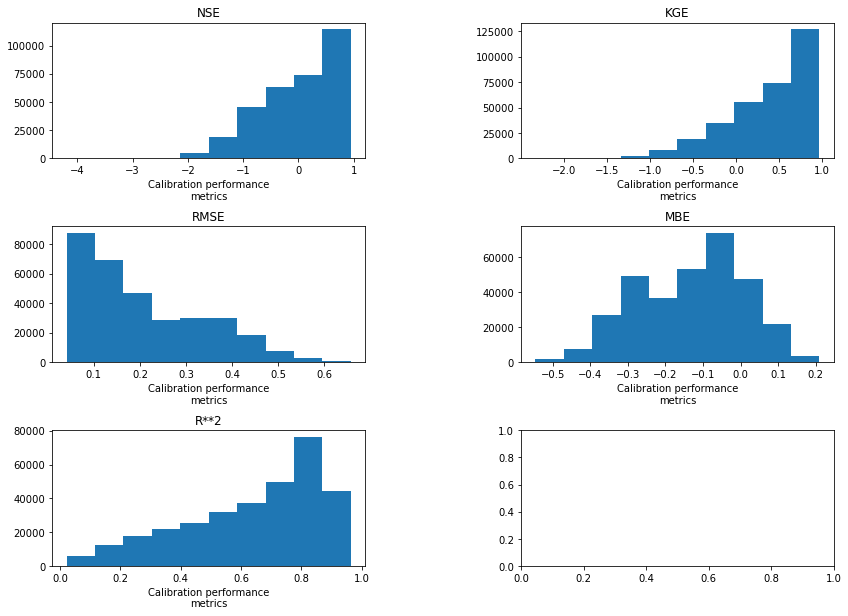

In [9]:
fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(14, 10))
fig.subplots_adjust(hspace = .5, wspace=.5)
NSE.plot.hist(ax=axes[0,0])
axes[0,0].set_title('NSE')
KGE.plot.hist(ax=axes[0,1])
axes[0,1].set_title('KGE')
RMSE.plot.hist(ax=axes[1,0])
axes[1,0].set_title('RMSE')
MBE.plot.hist(ax=axes[1,1])
axes[1,1].set_title('MBE')
R_2.plot.hist(ax=axes[2,0])
axes[2,0].set_title('R**2')

In [ ]:
fig.savefig('WY_domain_cal_metrics.pdf', format='pdf', dpi=300)

In [10]:
def get_top_idx(metric):
    x = np.mean(metric,axis=1).values
    top = np.max(x)
    index = np.where(x==top)
    return index

out = get_top_idx(NSE)
out

(array([8404, 8416, 8428, 8440, 8452, 8464, 8476]),)

# Data frame of metrics averaged over domain 

In [11]:
x = np.empty((len(calibration),5))
x[:,0] = np.mean(NSE.values,axis=1)
x[:,1] = np.mean(KGE,axis=1).values
x[:,2] = np.mean(RMSE,axis=1).values
x[:,3] = np.mean(R_2,axis=1).values
x[:,4] = np.mean(MBE,axis=1).values

dataav = pd.DataFrame(x,columns=['NSE', 'KGE', 'RMSE','R_2','MBE'])
dataav
#dataav.to_csv('calibration_params.csv')

,NSE,KGE,RMSE,R_2,MBE
0,-0.129652,0.256817,0.219223,0.610782,-0.161812
1,-0.392783,0.050035,0.245130,0.477043,-0.187932
2,-0.630753,-0.135258,0.268913,0.360198,-0.206415
3,-0.826532,-0.290993,0.286380,0.275484,-0.220231
4,-0.148385,0.241131,0.220751,0.604531,-0.163576
...,...,...,...,...,...
10747,0.168458,0.529702,0.193265,0.719171,-0.116573
10748,-0.026529,0.408671,0.193054,0.624148,-0.040795
10749,0.156183,0.538521,0.184118,0.718087,-0.076255
10750,0.194056,0.555681,0.186428,0.737194,-0.099478


Text(0.5, 1.0, 'R**2')

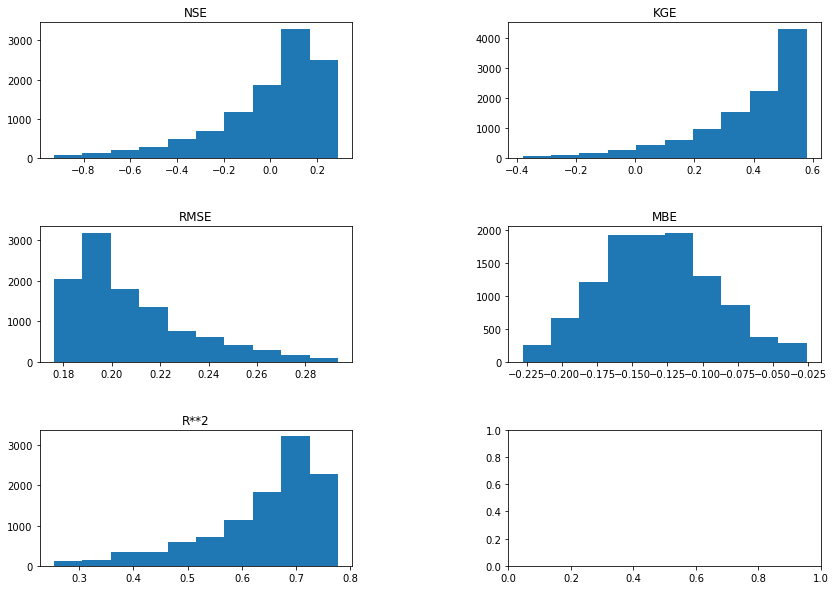

In [12]:
fig, axs = plt.subplots(3, 2,figsize=(14, 10))
fig.subplots_adjust(hspace = .5, wspace=.5)
axs[0, 0].hist(dataav['NSE'])
axs[0, 0].set_title('NSE')
axs[0, 1].hist(dataav['KGE'])
axs[0, 1].set_title('KGE')
axs[1, 0].hist(dataav['RMSE'])
axs[1, 0].set_title('RMSE')
axs[1, 1].hist(dataav['MBE'])
axs[1, 1].set_title('MBE')
axs[2, 0].hist(dataav['R_2'])
axs[2, 0].set_title('R**2')

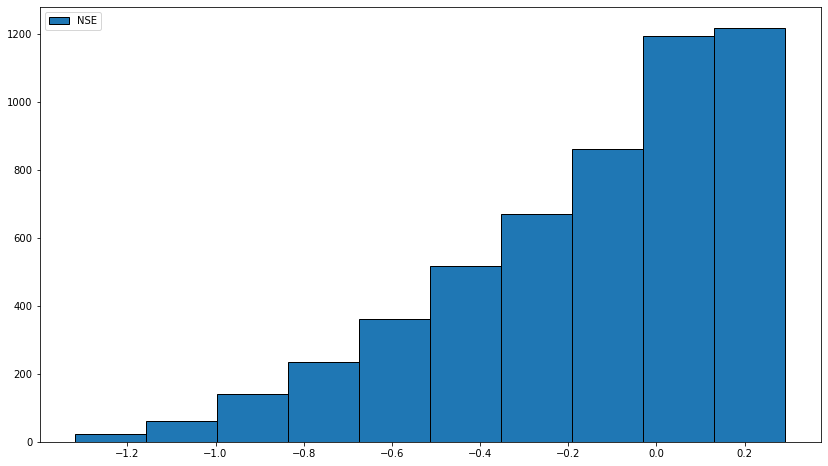

In [13]:
fig, axs = plt.subplots(figsize=(14, 8))
axs.hist(dataav['NSE'],label = 'NSE',align='mid',edgecolor='black')
axs.legend()


In [13]:
def get_top_idx(metric):
    if (metric == 'R_2') | (metric == 'NSE')|(metric == 'KGE'):
        x = dataav[metric].values
        index = np.where(x==np.max(x))
    elif (metric == 'MBE'):
        x = np.abs(dataav['MBE']).values
        index = np.where(x==np.min(x))
    elif (metric == 'RMSE'):
        x = dataav[metric]
        index = np.where(x==np.min(x))
    return index[0][0]


top_params = []
top_params.append(get_top_idx('NSE'))
top_params.append(get_top_idx('KGE'))
top_params.append(get_top_idx('MBE'))
top_params.append(get_top_idx('RMSE'))
top_params.append(get_top_idx('R_2'))
top_params

[8404, 8400, 9324, 8576, 8404]

In [14]:
#the parameters for the top performing runs
calibration.loc[top_params]

,lat_solar_flag,lapse_rate,prec_lapse_rate,ro_snowmax,cf_precip_scalar,ro_adjust,gap_frac
8404,1,".28,1.2,2.8,4.2,4.5,4.4,4.0,3.8,3.7,3.4,2.6,0.87","0.35,0.35,0.35,0.30,0.25,0.20, 0.20,0.20,0.20,...",450.0,0.7,5.0,0.0
8400,1,".28,1.2,2.8,4.2,4.5,4.4,4.0,3.8,3.7,3.4,2.6,0.87","0.35,0.35,0.35,0.30,0.25,0.20, 0.20,0.20,0.20,...",450.0,0.7,4.0,0.0
9324,1,".28,1.2,2.8,4.2,4.5,4.4,4.0,3.8,3.7,3.4,2.6,0.87","0.35,0.35,0.35,0.30,0.25,0.20, 0.20,0.20,0.20,...",725.0,0.7,4.0,0.0
8576,1,".28,1.2,2.8,4.2,4.5,4.4,4.0,3.8,3.7,3.4,2.6,0.87","0.35,0.35,0.35,0.30,0.25,0.20, 0.20,0.20,0.20,...",500.0,0.7,6.0,0.0
8404,1,".28,1.2,2.8,4.2,4.5,4.4,4.0,3.8,3.7,3.4,2.6,0.87","0.35,0.35,0.35,0.30,0.25,0.20, 0.20,0.20,0.20,...",450.0,0.7,5.0,0.0


# Top ranked score

In [19]:
dataav['score'].values

array([40592., 48950., 52303., ...,  9687.,  8056., 14958.])

In [20]:
dataav['NSE_rank']=dataav['NSE'].rank(ascending=False)
dataav['KGE_rank']=dataav['KGE'].rank(ascending=False)
dataav['R_2_rank']=dataav['R_2'].rank(ascending=False)
dataav['RMSE_rank']=dataav['RMSE'].rank()
dataav['MBE_rank']=np.abs(dataav['MBE']).rank()
dataav['score']=dataav['NSE_rank']+ dataav['KGE_rank']+dataav['R_2_rank']+ dataav['RMSE_rank']+dataav['MBE_rank']
dataav['score_rank'] = dataav['score'].rank()
dataav

,NSE,KGE,RMSE,R_2,MBE,NSE_rank,KGE_rank,R_2_rank,RMSE_rank,MBE_rank,score,score_rank
0,-0.129652,0.256817,0.219223,0.610782,-0.161812,8285.0,8474.0,7648.0,8033.0,8152.0,40592.0,8145.0
1,-0.392783,0.050035,0.245130,0.477043,-0.187932,9853.0,9923.0,9650.0,9685.0,9839.0,48950.0,9800.5
2,-0.630753,-0.135258,0.268913,0.360198,-0.206415,10448.0,10462.0,10469.0,10462.0,10462.0,52303.0,10462.0
3,-0.826532,-0.290993,0.286380,0.275484,-0.220231,10700.0,10693.0,10714.0,10700.0,10693.0,53500.0,10700.0
4,-0.148385,0.241131,0.220751,0.604531,-0.163576,8453.0,8649.0,7809.0,8187.0,8306.0,41404.0,8306.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10747,0.168458,0.529702,0.193265,0.719171,-0.116573,2489.0,2118.0,2671.0,3679.0,3707.0,14664.0,2790.0
10748,-0.026529,0.408671,0.193054,0.624148,-0.040795,6983.0,6129.0,7214.0,3567.0,172.0,24065.0,5079.0
10749,0.156183,0.538521,0.184118,0.718087,-0.076255,2902.0,1831.0,2727.0,1243.0,984.0,9687.0,1754.0
10750,0.194056,0.555681,0.186428,0.737194,-0.099478,1649.0,949.0,1474.0,1698.0,2286.0,8056.0,1334.0


In [27]:
dataav[(dataav['score_rank']==min(dataav['score_rank']))|(dataav['score_rank']==(min(dataav['score_rank']+1)))|(dataav['score_rank']==(min(dataav['score_rank']+2)))]

,NSE,KGE,RMSE,R_2,MBE,NSE_rank,KGE_rank,R_2_rank,RMSE_rank,MBE_rank,score,score_rank
8492,0.282461,0.578819,0.176691,0.775329,-0.086118,32.0,18.0,46.0,32.0,1467.0,1595.0,4.0
8504,0.282461,0.578819,0.176691,0.775329,-0.086118,32.0,18.0,46.0,32.0,1467.0,1595.0,4.0
8516,0.282461,0.578819,0.176691,0.775329,-0.086118,32.0,18.0,46.0,32.0,1467.0,1595.0,4.0
8528,0.282461,0.578819,0.176691,0.775329,-0.086118,32.0,18.0,46.0,32.0,1467.0,1595.0,4.0
8540,0.282461,0.578819,0.176691,0.775329,-0.086118,32.0,18.0,46.0,32.0,1467.0,1595.0,4.0
8552,0.282461,0.578819,0.176691,0.775329,-0.086118,32.0,18.0,46.0,32.0,1467.0,1595.0,4.0
8564,0.282461,0.578819,0.176691,0.775329,-0.086118,32.0,18.0,46.0,32.0,1467.0,1595.0,4.0


In [ ]:
#this worked with a smaller calibration parameter set but does not work if their are ties for first place rankings
rank_params = np.where((dataav['score_rank']==1)|(dataav['score_rank']==2)|(dataav['score_rank']==3))

In [28]:
rank_params = np.where((dataav['score_rank']==min(dataav['score_rank'])))
top_params = rank_params[0]
label = dataav['score_rank'][top_params].values
top_params

array([8492, 8504, 8516, 8528, 8540, 8552, 8564])

In [29]:
label =[]
label.append(dataav['score_rank'])

In [30]:
ins=dataav['score_rank'][top_params].values
ins[1]

4.0

## Re-run SM with optimal configuration 

In [35]:
parFile = '/nfs/attic/dfh/Aragon2/mar2020_snowmodel-dfhill2/snowmodel.par'
incFile = '/nfs/attic/dfh/Aragon2/mar2020_snowmodel-dfhill2/code/snowmodel.inc'
compileFile = '/nfs/attic/dfh/Aragon2/mar2020_snowmodel-dfhill2/code/compile_snowmodel.script'
ctlFile = '/nfs/attic/dfh/Aragon2/mar2020_snowmodel-dfhill2/ctl_files/wo_assim/swed.ctl'
sweFile = '/nfs/attic/dfh/Aragon2/mar2020_snowmodel-dfhill2/outputs/wo_assim/swed.gdat'
#Edit the par file to set parameters with new values
def edit_par(par_dict,parameter,new_value):
    lines = open(parFile, 'r').readlines()
    if par_dict[parameter][2] == 14 or par_dict[parameter][2] == 17 \
    or par_dict[parameter][2] == 18 or par_dict[parameter][2] == 19 \
    or par_dict[parameter][2] == 93 or par_dict[parameter][2] == 95 \
    or par_dict[parameter][2] == 97 or par_dict[parameter][2] == 100 \
    or par_dict[parameter][2] == 102 or par_dict[parameter][2] == 104 \
    or par_dict[parameter][2] == 107 or par_dict[parameter][2] == 108:
        text = str(new_value)+'\n'
    else:
        text = str(new_value)+'\t\t\t!'+par_dict[parameter][1]
    lines[par_dict[parameter][2]] = text
    out = open(parFile, 'w')
    out.writelines(lines)
    out.close()

In [36]:
with open('par_base.json') as f:
    base = json.load(f)
    
for key in base:
    edit_par(base,key,base[key][0])
    
#edit snowmodel.par
edit_par(base,'nx',np.shape(gdf)[0])
edit_par(base,'ny',1)
edit_par(base,'xmn',487200)
edit_par(base,'ymn',4690100)
edit_par(base,'dt',21600)
edit_par(base,'iyear_init',2014)
edit_par(base,'imonth_init',10)
edit_par(base,'iday_init',1)
edit_par(base,'xhour_init',0)
edit_par(base,'max_iter',7300)
edit_par(base,'met_input_fname','met/mm_wy_2014-2019.dat')
edit_par(base,'ascii_topoveg',1)
edit_par(base,'topo_ascii_fname','topo_vege/DEM_WY.asc')
edit_par(base,'veg_ascii_fname','topo_vege/NLCD2016_WY.asc')
edit_par(base,'xlat',40.2)
edit_par(base,'run_snowtran',0)
edit_par(base,'barnes_lg_domain',1)
edit_par(base,'snowmodel_line_flag',1)
edit_par(base,'lapse_rate','.28,1.2,2.8,4.2,4.5,4.4,4.0,3.8,3.7,3.4,2.6,0.87')#
edit_par(base,'prec_lapse_rate','0.4,0.4,0.46,0.41,0.27,0.24,0.21,0.17,0.22,0.32,0.43,0.39')#
edit_par(base,'print_inc',4)
edit_par(base,'print_var_01','y')
edit_par(base,'print_var_09','y')
edit_par(base,'print_var_10','y')
edit_par(base,'print_var_11','y')
edit_par(base,'print_var_12','y')
edit_par(base,'print_var_14','y')
edit_par(base,'print_var_18','y')
edit_par(base,'snowfall_frac',3)

In [37]:
num_sim_days = 1825
def get_mod_output_line(inFile):
    #open the grads model output file, 'rb' indicates reading from binary file
    grads_data = open(inFile,'rb')
    # convert to a numpy array 
    numpy_data = np.fromfile(grads_data,dtype='float32',count=-1)
    #close grads file 
    grads_data.close()
    #reshape the data - edit this for different domain!!!!!
    numpy_data = np.reshape(numpy_data,(num_sim_days,1,np.shape(gdf)[0]))
    #swe only at station point
    data = np.squeeze(numpy_data[:,0,:]) 

    return data

In [38]:
mod_swe = get_mod_output_line(sweFile)
np.shape(mod_swe)

(1825, 30)

In [41]:
%%time
%cd /nfs/attic/dfh/Aragon2/mar2020_snowmodel-dfhill2/

top_swe = np.empty([np.shape(out)[1],np.shape(gdf)[0],num_sim_days])
for i in range(np.shape(out)[1]):
    edit_par(base,'lat_solar_flag',calibration.lat_solar_flag[out[0][i]])
#     edit_par(base,'use_shortwave_obs',calibration.use_shortwave_obs[out[0][i]])
#     edit_par(base,'use_longwave_obs',calibration.use_longwave_obs[out[0][i]])
    edit_par(base,'lapse_rate',calibration.lapse_rate[out[0][i]])
    edit_par(base,'prec_lapse_rate',calibration.prec_lapse_rate[out[0][i]])
    edit_par(base,'ro_snowmax',calibration.ro_snowmax[out[0][i]])
    edit_par(base,'cf_precip_scalar',calibration.cf_precip_scalar[out[0][i]])
    edit_par(base,'ro_adjust',calibration.ro_adjust[out[0][i]]) 
    ! nohup ./snowmodel
    mod_swe = get_mod_output_line(sweFile)
    top_swe[i,:,:] = mod_swe

%cd  /nfs/attic/dfh/Aragon2/Notebooks/calibration_python

/nfs/attic/dfh/Aragon2/mar2020_snowmodel-dfhill2
nohup: ignoring input and appending output to ‘nohup.out’


ValueError: could not broadcast input array from shape (1825,30) into shape (30,1825)

In [42]:
%%time
%cd /nfs/attic/dfh/Aragon2/mar2020_snowmodel-dfhill2/

top_swe = np.empty([np.shape(top_params)[0],num_sim_days,np.shape(gdf)[0]])
for i in range(np.shape(top_params)[0]):
    edit_par(base,'lat_solar_flag',calibration.lat_solar_flag[top_params[i]])
#     edit_par(base,'use_shortwave_obs',calibration.use_shortwave_obs[out[0][i]])
#     edit_par(base,'use_longwave_obs',calibration.use_longwave_obs[out[0][i]])
    edit_par(base,'lapse_rate',calibration.lapse_rate[top_params[i]])
    edit_par(base,'prec_lapse_rate',calibration.prec_lapse_rate[top_params[i]])
    edit_par(base,'ro_snowmax',calibration.ro_snowmax[top_params[i]])
    edit_par(base,'cf_precip_scalar',calibration.cf_precip_scalar[top_params[i]])
    edit_par(base,'ro_adjust',calibration.ro_adjust[top_params[i]])  
    ! nohup ./snowmodel
    mod_swe = get_mod_output_line(sweFile)
    top_swe[i,:,:] = mod_swe

%cd  /nfs/attic/dfh/Aragon2/Notebooks/calibration_python

/nfs/attic/dfh/Aragon2/mar2020_snowmodel-dfhill2
nohup: ignoring input and appending output to ‘nohup.out’
nohup: ignoring input and appending output to ‘nohup.out’
nohup: ignoring input and appending output to ‘nohup.out’
nohup: ignoring input and appending output to ‘nohup.out’
nohup: ignoring input and appending output to ‘nohup.out’
nohup: ignoring input and appending output to ‘nohup.out’
nohup: ignoring input and appending output to ‘nohup.out’
/nfs/attic/dfh/Aragon2/Notebooks/calibration_python
CPU times: user 74.1 ms, sys: 85.9 ms, total: 160 ms
Wall time: 1min 37s


In [43]:
np.shape(top_swe)[0]

7

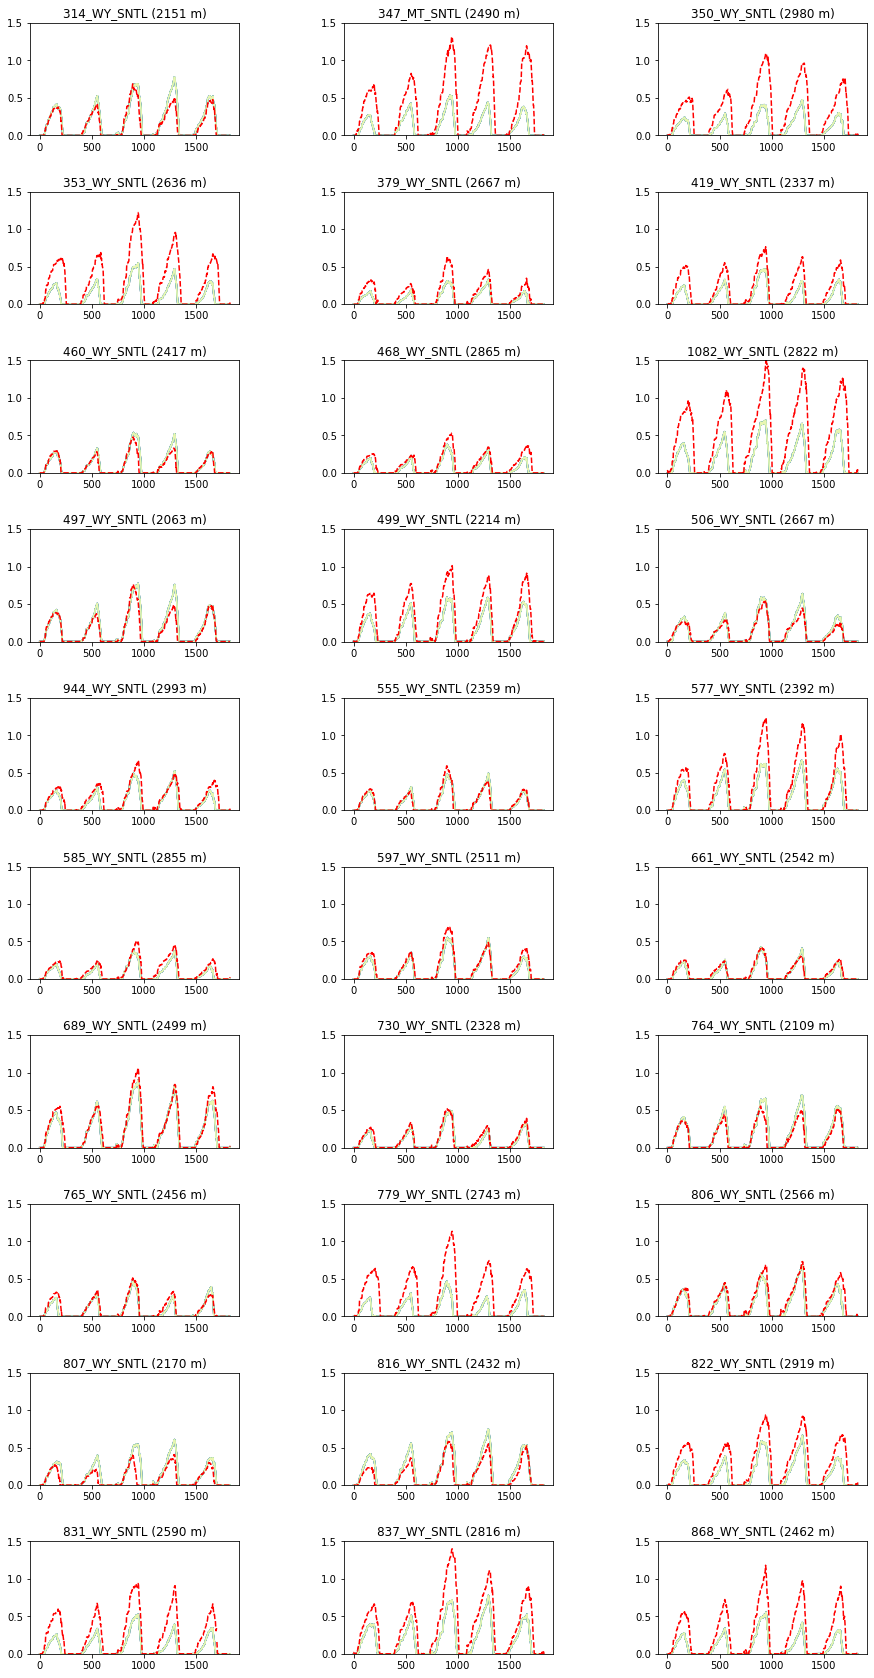

In [47]:
elev = gdf['elevation_m'].values
station = gdf['code'].values

from matplotlib.pyplot import cm



n=np.shape(top_swe)[0] 

#YlGnBu

fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(15, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)

axs = axs.ravel()
# 1, 2, 3, 4, 5, 
for i in range(np.shape(gdf)[0]):
    nam = station[i]
    el = elev[i]
    x = df[nam].values
    mod = np.squeeze(top_swe[:,:,i])
    color=iter(cm.YlGnBu_r(np.linspace(0,1,n+1)))
    for j in range(n):
        c=next(color)
        axs[i].plot(np.transpose(mod[j,:]),c=c)
    axs[i].plot(x,'r--')
    axs[i].set_title(nam+' ('+el[0:4]+' m)')
    axs[i].set_ylim([0, 1.5])
#     if i == 0:
#         axs[i].legend([str(label[0]),str(label[1]),str(label[2]),'stn'],bbox_to_anchor=(1.05, 1), loc='upper left',)

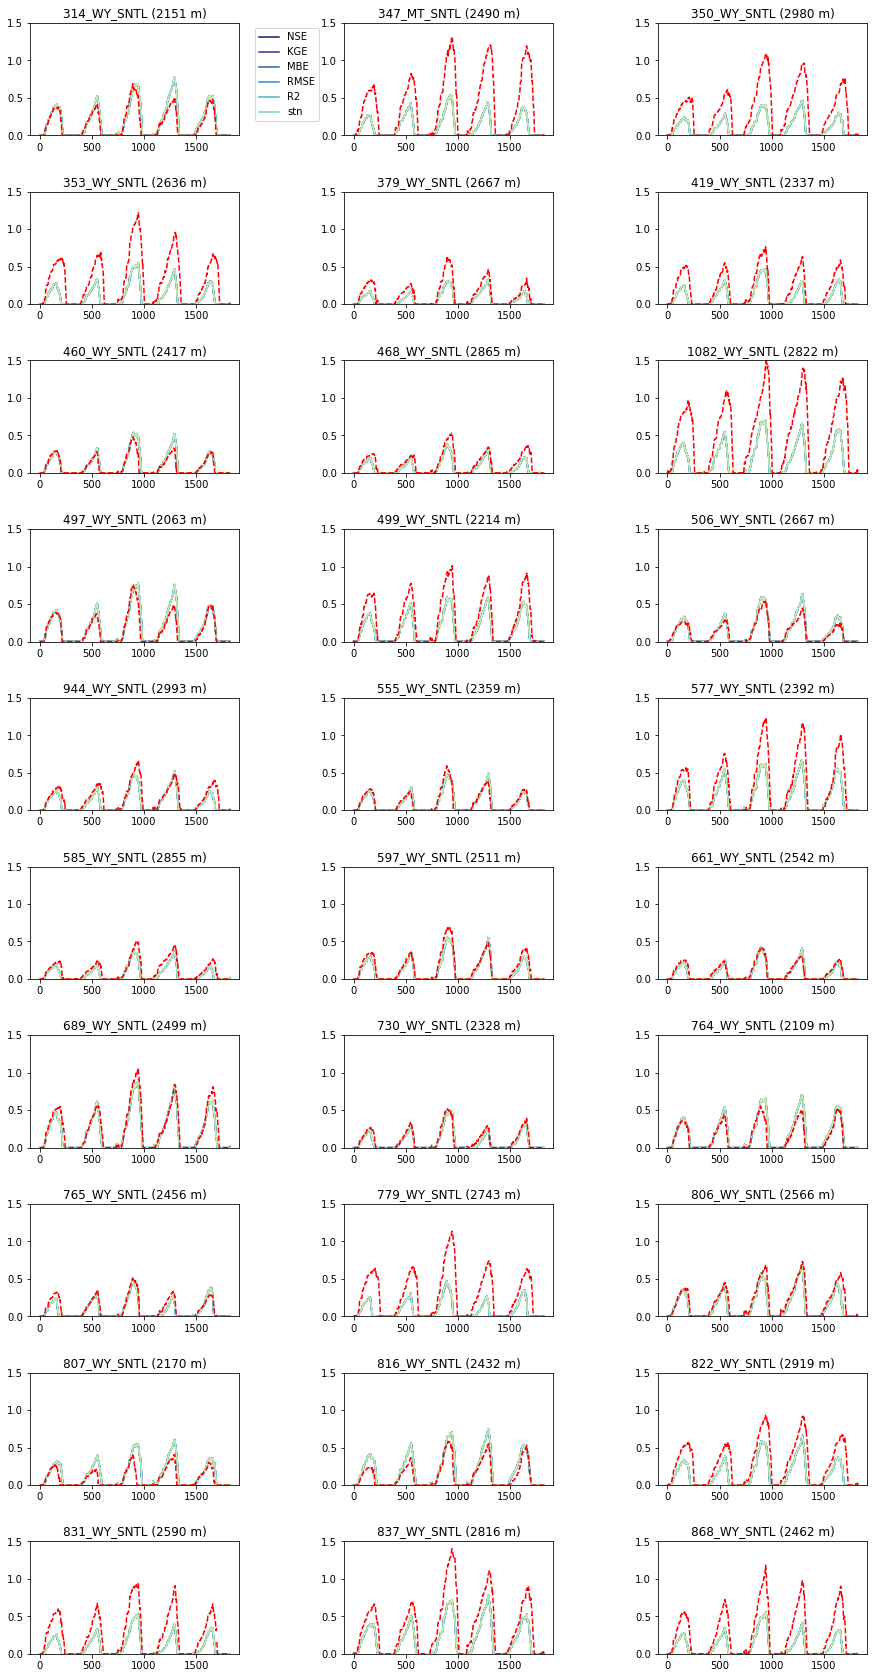

In [45]:
#Ranking plot
elev = gdf['elevation_m'].values
station = gdf['code'].values

from matplotlib.pyplot import cm



n=np.shape(top_swe)[0] #5 metrics 

#YlGnBu

fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(15, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)

axs = axs.ravel()
# 1, 2, 3, 4, 5, 
for i in range(np.shape(gdf)[0]):
    nam = station[i]
    el = elev[i]
    x = df[nam].values
    mod = np.squeeze(top_swe[:,:,i])
    color=iter(cm.YlGnBu_r(np.linspace(0,1,n+2)))
    for j in range(n):
        c=next(color)
        axs[i].plot(np.transpose(mod[j,:]),c=c)
    axs[i].plot(x,'r--')
    axs[i].set_title(nam+' ('+el[0:4]+' m)')
    axs[i].set_ylim([0, 1.5])
    if i == 0:
        axs[i].legend(['NSE', 'KGE', 'MBE','RMSE','R2','stn'],bbox_to_anchor=(1.05, 1), loc='upper left',)

In [46]:
fig.savefig('Figs/WY/SWE_top_calmetrics_2020-06_08_rank.pdf', format='pdf', dpi=300)

In [ ]:
#NSE
station = gdf['code'].values
#labels = ['15', '16', '17','18','19']

fig, axs = plt.subplots(nrows=8, ncols=4, figsize=(15, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)

axs = axs.ravel()
# 1, 2, 3, 4, 5, 
for i in range(np.shape(gdf)[0]):
    nam = station[i]
    x = df[nam].values
    mod = np.squeeze(top_swe[:,:,i])
    axs[i].plot(np.transpose(mod),'c')
    axs[i].plot(x,'r')
    axs[i].set_title(nam)
    #axs[i].set_ylim([0, 3.5])



# Initiate full run of SM based on above findings

In [21]:
#the parameters for the top performing runs
calibration.loc[get_top_idx('KGE')]

lat_solar_flag                                                      1
lapse_rate           .28,1.2,2.8,4.2,4.5,4.4,4.0,3.8,3.7,3.4,2.6,0.87
prec_lapse_rate     0.4,0.4,0.46,0.41,0.27,0.24,0.21,0.17,0.22,0.3...
ro_snowmax                                                        500
cf_precip_scalar                                                  1.1
ro_adjust                                                           6
gap_frac                                                          0.2
Name: 4917, dtype: object

In [28]:
#function to edit SnowModel Files other than .par
def replace_line(file_name, line_num, text):
    lines = open(file_name, 'r').readlines()
    lines[line_num] = text
    out = open(file_name, 'w')
    out.writelines(lines)
    out.close()

##edit snowmodel.inc
replace_line(incFile, 12, '      parameter (nx_max=1383,ny_max=2477)\n')#full domain

#remove line flag
edit_par(base,'snowmodel_line_flag',0)
edit_par(base,'nx',1382)
edit_par(base,'ny',2476)
edit_par(base,'lat_solar_flag',calibration.lat_solar_flag.loc[get_top_idx('KGE')])
edit_par(base,'lapse_rate',calibration.lapse_rate.loc[get_top_idx('KGE')])
edit_par(base,'prec_lapse_rate',calibration.prec_lapse_rate.loc[get_top_idx('KGE')])
edit_par(base,'ro_snowmax',calibration.ro_snowmax.loc[get_top_idx('KGE')])
edit_par(base,'cf_precip_scalar',calibration.cf_precip_scalar.loc[get_top_idx('KGE')])
edit_par(base,'ro_adjust',calibration.ro_adjust.loc[get_top_idx('KGE')])  
    
#run compile script 
#Compile SnowModel - with Dave's code 
%cd /nfs/attic/dfh/Aragon2/mar2020_snowmodel-dfhill/code/
! ./compile_snowmodel.script
%cd  /nfs/attic/dfh/Aragon2/Notebooks/calibration_python

/nfs/attic/dfh/Aragon2/mar2020_snowmodel-dfhill/code
/nfs/attic/dfh/Aragon2/Notebooks/calibration_python


# Find top performing calibration combinations
This is looking at individual stations for individual calibration runs

In [ ]:
NSE = data.cal_metrics.loc[:,"NSE",:]
nse_top = np.amax(data.cal_metrics.loc[:,"NSE",:],axis = 0)
KGE = data.cal_metrics.loc[:,"KGE",:]
kge_top = np.amax(data.cal_metrics.loc[:,"KGE",:],axis = 0)
RMSE = data.cal_metrics.loc[:,"RMSE",:]
rmse_top = np.amin(data.cal_metrics.loc[:,"RMSE",:],axis = 0)
MAE = data.cal_metrics.loc[:,"MAE",:]
mae_top = np.amin(data.cal_metrics.loc[:,"MAE",:],axis = 0)
MBE = data.cal_metrics.loc[:,"MBE",:]
mbe_top = np.amin(data.cal_metrics.loc[:,"MBE",:],axis = 0)

In [ ]:
NSE = data.cal_metrics.loc[:,"NSE",:].values
KGE = data.cal_metrics.loc[:,"KGE",:].values
RMSE = data.cal_metrics.loc[:,"RMSE",:].values
MAE = data.cal_metrics.loc[:,"MAE",:].values
MBE = data.cal_metrics.loc[:,"MBE",:].values

In [ ]:
#plot distribution of calibration metrics 

fig, axs = plt.subplots(1, 3,figsize=(14, 8))
axs[0].hist(NSE,label = 'NSE',align='mid',edgecolor='black')
axs[0].legend()
axs[1].hist(KGE,label = 'KGE',align='mid',edgecolor='black')
axs[1].legend()
axs[2].hist(RMSE,label = 'RMSE',align='mid',edgecolor='black')
axs[2].legend()

In [ ]:
nse_ar = np.amax(data.cal_metrics.loc[:,"KGE",:].values,axis = 0)
print(nse_ar)
#print('maxNSE:', nse_top)
nse_ar.shape

In [ ]:
NSE[:,0]==nse_top[0].values

In [ ]:
station = gdf['code'].values

index = {}
for i in range(np.shape(gdf)[0]):
    nam = station[i]
    station_met={}
    station_met['NSE'] = np.where(NSE[:,i]==nse_top[i].values)
    station_met['KGE'] = np.where(KGE[:,i]==kge_top[i].values)
    station_met['RMSE'] = np.where(RMSE[:,i]==rmse_top[i].values)
    station_met['MAE'] = np.where(MAE[:,i]==mae_top[i].values)
    station_met['MBE'] = np.where(MBE[:,i]==mbe_top[i].values)
    #print(station_met)
    index[nam]=station_met
print(index.keys())

In [ ]:
index['350_WY_SNTL']

In [ ]:
top_params = np.array([3948,1331])
top_params[0]

In [ ]:
%%time
%cd /nfs/attic/dfh/Aragon2/mar2020_snowmodel-dfhill/

top_swe = np.empty([np.shape(top_params)[0],num_sim_days,np.shape(gdf)[0]])
for i in range(np.shape(top_params)[0]):
    edit_par(base,'lat_solar_flag',calibration.lat_solar_flag[top_params[i]])
#     edit_par(base,'use_shortwave_obs',calibration.use_shortwave_obs[out[0][i]])
#     edit_par(base,'use_longwave_obs',calibration.use_longwave_obs[out[0][i]])
    edit_par(base,'lapse_rate',calibration.lapse_rate[top_params[i]])
    edit_par(base,'prec_lapse_rate',calibration.prec_lapse_rate[top_params[i]])
    edit_par(base,'ro_snowmax',calibration.ro_snowmax[top_params[i]])
    edit_par(base,'cf_precip_scalar',calibration.cf_precip_scalar[top_params[i]])
    edit_par(base,'ro_adjust',calibration.ro_adjust[top_params[i]])  
    ! nohup ./snowmodel
    mod_swe = get_mod_output_line(sweFile)
    top_swe[i,:,:] = mod_swe

%cd  /nfs/attic/dfh/Aragon2/Notebooks/calibration_python

In [ ]:
#If NSE is greater than 0 - include indices of the station 
nse_idx=[]
for i in range(np.shape(gdf)[0]):
    nam = station[i]
    if nse_top.values[i]>0:
        idx = list(index[nam]['NSE'][0])
        print(idx)
        nse_idx = nse_idx+idx
nse_idx_all = np.unique(nse_idx)

new = calibration['ro_snowmax'].iloc[nse_idx]
np.unique(new)

#nse_idx_all

In [ ]:
#If KGE is greater than 0 - include indices of the station 
kge_idx=[]
for i in range(np.shape(gdf)[0]):
    nam = station[i]
    if kge_top.values[i]>0.5:
        idx = list(index[nam]['KGE'][0])
        print(idx)
        kge_idx = kge_idx+idx
kge_idx_all = np.unique(kge_idx)

new = calibration['ro_snowmax'].iloc[kge_idx_all]
np.unique(new)

In [ ]:
calibration['lapse_rate'].iloc[nse_idx].values

In [ ]:
in_idx = kge_idx
ro_snowmax = calibration['ro_snowmax'].iloc[in_idx].values
p_cor = calibration['cf_precip_scalar'].iloc[in_idx].values
lapse = calibration['lapse_rate'].iloc[in_idx].values
p_lapse = calibration['prec_lapse_rate'].iloc[in_idx].values
ro_adjust = calibration['ro_adjust'].iloc[in_idx].values

fig, axs = plt.subplots(1, 3,figsize=(14, 8))
axs[0].hist(ro_snowmax,label = 'ro_snowmax',align='mid',edgecolor='black',bins = [250,300,350,400,450,500,550,600,650,700,750,800])
axs[0].legend()
axs[1].hist(p_cor,label = 'precip correction',align='mid',edgecolor='black',bins = [.6,.7,.8,.9,1.0,1.1,1.2])
axs[1].legend()
axs[2].hist(ro_adjust,label = 'ro_adjust',align='mid',edgecolor='black',bins = [3,4,5,6,7])
axs[2].legend()

In [ ]:
from collections import Counter

print(Counter(lapse).keys()) # equals to list(set(words))
Counter(lapse).values() # counts the elements' frequency

In [ ]:
#https://mode.com/example-gallery/python_histogram/
in_param = 'ro_snowmax'
ax = df.hist(column=in_param, by='user_type', bins=25, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)


In [ ]:
nam = station[0]
index[nam]['NSE'][0]

In [ ]:
#a1 = index['314_WY_SNTL']['NSE'][0]

a = np.concatenate((index['353_WY_SNTL']['NSE'][0], index['353_WY_SNTL']['KGE'][0]))
a
#index['314_WY_SNTL']['MAE'][0],index['314_WY_SNTL']['RMSE'][0],index['350_WY_SNTL']['MBE'][0],

In [ ]:
calibration.iloc[a]

In [ ]:
#tons of values for mae,rmse
a1 = index['314_WY_SNTL']['MBE'][0]
a

In [ ]:
idx = np.unique(a)
idx.shape

In [ ]:
for 
cal_list = calibration['5']

cal_list

In [ ]:
with open('test.txt', 'w') as f:
    for item in array:
        f.write(str(item))
    f.close